In [1]:
from __future__ import print_function
from __future__ import division
from pathlib import Path

import cv2
import numpy as np
import argparse
import os
import os.path as op
import matplotlib.pyplot as plt

In [2]:
data_pth = op.join("images", "test2")
img_set = []
exposure_time = []

In [3]:
def imshow(img, cmap=None):
    plt.imshow(img, cmap)
    plt.show()

In [4]:
exposure_time.clear()

with open(op.join(data_pth, 'shutter_speed.csv'), 'r') as fp:
    lines = fp.readlines()

    for line in lines:
        filename, shutter_speed = line.split(', ')

        # exposure time
        shutter_speed = shutter_speed.split('\"')
        if len(shutter_speed) == 2:
            exp_t = int(shutter_speed[0]) + 0.1*int(shutter_speed[1])
        else:
            exp_t = 1/int(shutter_speed[0])
        exposure_time.append(exp_t)

        # read image
        #filepath = op.join(data_path, filename + img_type)
        #img = cv2.imread(filepath)
        #img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        #img_set.append(img)

        # display data
        #print(filepath)
        print(exp_t)
        #imshow(img)
exposure_time = np.asarray(exposure_time, dtype=np.float32)

0.016666666666666666
0.0125
0.01
0.008
0.00625
0.005
0.004
0.003125
0.0025
0.002
0.0015625
0.00125
0.001
0.0008
0.000625
0.0005
0.0004
0.0003125
0.00025


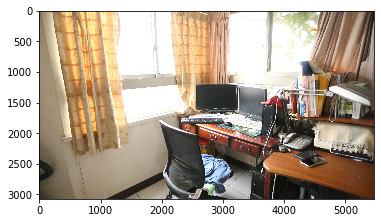

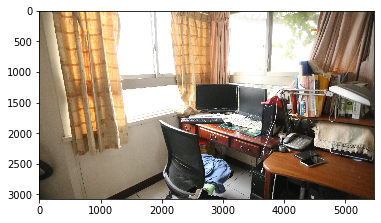

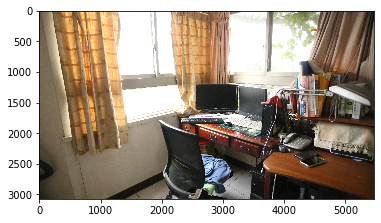

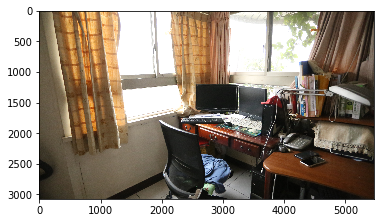

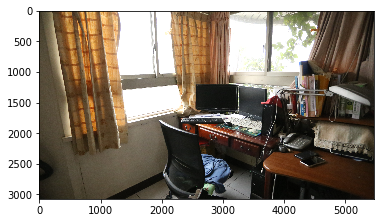

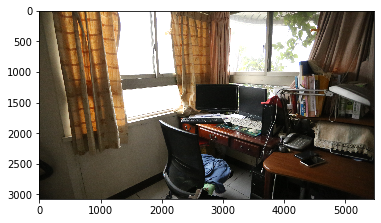

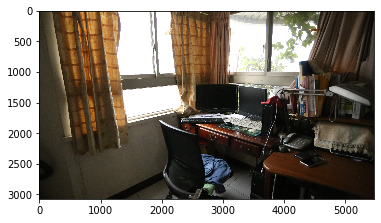

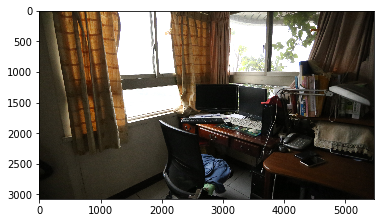

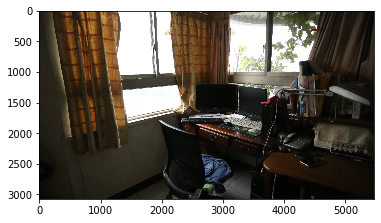

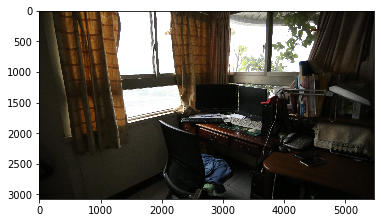

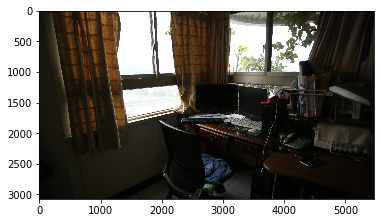

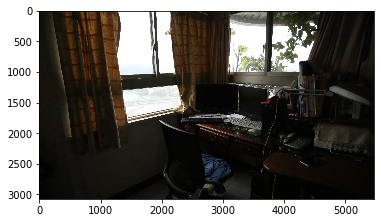

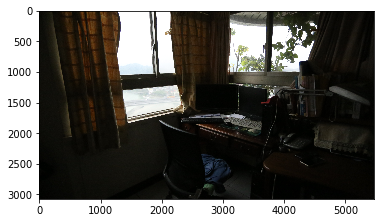

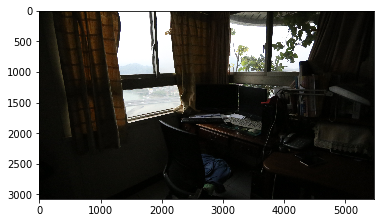

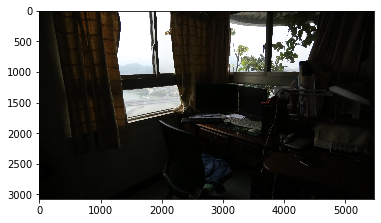

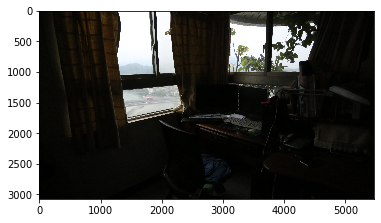

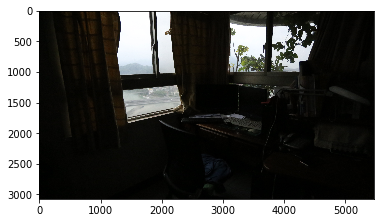

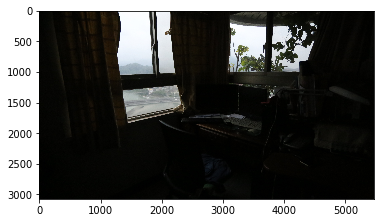

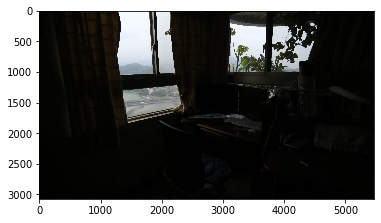

In [5]:
img_set.clear()
for img_pth in sorted(Path(data_pth).glob(f'IMG*.JPG')):
    #print(img_pth)
    img = cv2.imread(op.join(img_pth))
    #img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    #imshow(img)
    imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    img_set.append(img)

In [6]:
#images, times = loadExposureSeq(args.input)
calibrate = cv2.createCalibrateDebevec()
response = calibrate.process(img_set, exposure_time)

In [7]:
merge_debevec = cv2.createMergeDebevec()
hdr = merge_debevec.process(img_set, exposure_time, response)

In [8]:
print(np.max(hdr), np.min(hdr), hdr.shape)

33344.977 1.3456912 (3072, 5472, 3)


In [9]:
tonemap = cv2.createTonemap(2.2)
ldr = tonemap.process(hdr)
print(np.max(ldr), np.min(ldr), ldr.shape)

1.0 3.9895262e-06 (3072, 5472, 3)


In [10]:
merge_mertens = cv2.createMergeMertens()
fusion = merge_mertens.process(img_set)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


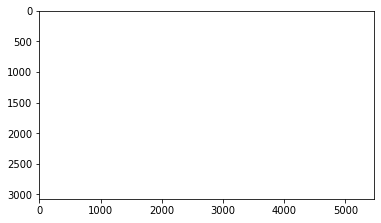

In [12]:
imshow(cv2.cvtColor(ldr * 255, cv2.COLOR_BGR2RGB))

In [11]:
cv2.imwrite('ldr.png', ldr * 255)

True

In [13]:
cv2.imwrite('fusion.png', fusion * 255)

True

In [ ]:
images, times = loadExposureSeq(args.input)
calibrate = cv.createCalibrateDebevec()
response = calibrate.process(images, times)
merge_debevec = cv.createMergeDebevec()
hdr = merge_debevec.process(images, times, response)
tonemap = cv.createTonemap(2.2)
ldr = tonemap.process(hdr)
merge_mertens = cv.createMergeMertens()
fusion = merge_mertens.process(images)